In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


In [2]:
df1 = pd.read_csv("task_2/rfq.csv")
df2 = pd.read_csv("task_2/reference_properties.tsv", sep='\t')



# Task B.1

## Step 1. Normalize grade keys (case, suffixes, aliases).

#### Some exploration & case sensitivity

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   grade                 941 non-null    object 
 2   grade_suffix          0 non-null      float64
 3   coating               318 non-null    object 
 4   finish                665 non-null    object 
 5   surface_type          135 non-null    object 
 6   surface_protection    287 non-null    object 
 7   form                  927 non-null    object 
 8   thickness_min         833 non-null    float64
 9   thickness_max         834 non-null    float64
 10  width_min             539 non-null    float64
 11  width_max             652 non-null    float64
 12  length_min            131 non-null    float64
 13  height_min            132 non-null    float64
 14  height_max            2 non-null      float64
 15  weight_min            

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Grade/Material                     175 non-null    object 
 1   UNS_No                             0 non-null      float64
 2   Steel_No                           0 non-null      float64
 3   Standards                          175 non-null    object 
 4   Carbon (C)                         175 non-null    object 
 5   Manganese (Mn)                     175 non-null    object 
 6   Silicon (Si)                       134 non-null    object 
 7   Sulfur (S)                         163 non-null    object 
 8   Phosphorus (P)                     163 non-null    object 
 9   Chromium (Cr)                      42 non-null     object 
 10  Nickel (Ni)                        16 non-null     object 
 11  Molybdenum (Mo)                    30 non-null     object 

Looking into "grade" and "grade_suffix" columns of df1 and "Grade/Material" of the df2.


In [5]:

df2["Grade/Material"].isna().sum(), df1[["grade", "grade_suffix"]].isna().sum()


(0,
 grade             59
 grade_suffix    1000
 dtype: int64)

In [6]:
df2['Grade/Material'].dropna().unique(), df2['Grade/Material'].nunique()

(array(['S235JR', 'S275JR', 'S355JR', 'S420M', 'S460M', 'S500MC', 'S700MC',
        'S960MC', 'DC01', 'DC03', 'DC04', 'DD11', 'DX51D', 'DX52D',
        'DX53D', 'S250GD', 'S350GD', 'DP600', 'DP780', 'DP980', 'TRIP780',
        'CP800', 'HC420LA', 'CR240LA', 'Hardox 400', 'Hardox 500',
        '1.2379', '1.2714', 'DC06', 'DD13', 'DD14', 'DX54', 'S55GD',
        'S355', 'HC260', 'HC700', 'HC660XD', 'CR3', 'CR240', 'CR340',
        'CR340LA', '1.2083', '46SiCrMo6', '304', '316', '321', '430',
        '410', '420', '17-4PH', '2205', '1.2343', '42CrMo4', '42CrMo4+QT',
        '42CrMoS4', '34CrNiMo6+QT', '22MnB5', '26MnB5', '26Mnb5', '34MnB5',
        'C45+C', 'C45R', 'C50', 'C55', 'C60', 'C100', 'CR210IF', 'CR180BH',
        'CR210', 'CR300LA', 'CR380LA', 'CR420LA', 'CR460', 'CR460LA',
        'CR440Y780T DP', 'CR440Y780T-DP', 'CR330Y590T', 'CR440Y780T',
        '11SMn30', '16MnCrS5', '16Mo3', 'CR4', 'S235', 'S275', 'S355J2',
        'S355J2+N', 'S420', 'S460', 'S420MC', 'S460MC', 'S550MC',

In [7]:
df1['grade'].dropna().unique(), df1['grade'].nunique()

(array(['S700MC', 'S250GD', 'DX51D', 'S235', 'S355MC', 'DC01', 'S500MC',
        'S235JR', 'S220GD', 'DD11', 'HC420LA', 'DC04', 'DC03', 'S420',
        'S500', 'DX51', 'S320GD', 'S420MC', 'S355JR', 'S600MC', 'S355J2+N',
        'S355', 'S460', 'S355J2C', 'CR460LA', 'CR420LA', 'S550GD',
        'S460MC', '22MnB5', 'HC260LA', 'S320MC', 'DX54D', 'S315MC',
        'S235JRG2', 'HX180YD', 'HE320D', 'C45+C', 'C50', 'C55', 'C60',
        'Cf53', 'C45R', '42CrMoS4', '1.2343', 'DX56D', 'S450', 'S350',
        'CR240LA', '46SiCrMo6', '42CrMo4', '16Mo3', 'CR210', 'CR240',
        'S275JR', 'HX420LAD', 'S350GD', 'CR380LA', 'DC06', 'HC500LA',
        'HC550LA', 'S650MC', 'Hardox 450', 'DX54', 'DX53', 'HX300LAD',
        'HC260', 'S550MC', 'DD13', 'DD12', 'P265GH', 'S355J2', 'DD14',
        'CR340', 'HC260LAD', 'HC340LA', 'C1000S', 'S55GD', 'S280',
        'HX340LAD', 'CR210IF', 'HC220B', 'CR300LA', 'HX380', 'HX420',
        'HX300', '34CrNiMo6+QT', '11SMn30', 'DP780', 'CR180BH', '26Mnb5',
        'H

from the first glance we see similar naming convention, the amount of unique entities differ - 175 and 158.

In [8]:
lower_case_grades_df1 = df1['grade'].str.lower().dropna().unique()
orig_case_grades_df1 = df1['grade'].dropna().unique()
print(f"Original unique count: {len(orig_case_grades_df1)}")
print(f"Lowercase unique count: {len(lower_case_grades_df1)}")
lower_case_grades_df2 = df2['Grade/Material'].str.lower().dropna().unique()
orig_case_grades_df2 = df2['Grade/Material'].dropna().unique()
print(f"Original unique count: {len(orig_case_grades_df2)}")
print(f"Lowercase unique count: {len(lower_case_grades_df2)}")

Original unique count: 158
Lowercase unique count: 156
Original unique count: 175
Lowercase unique count: 173


Some uppercase/lower case similar entries exist, have a look at it:

In [9]:
df1_case_map = {}
for grade in df1['grade'].dropna():
    df1_case_map.setdefault(grade.lower(), set()).add(grade)
for lowercase, variants in df1_case_map.items():
    if len(variants) > 1:
        print(f"{lowercase}: {sorted(variants)}")
print("---")
df2_case_map = {}
for grade in df2['Grade/Material'].dropna():
    df2_case_map.setdefault(grade.lower(), set()).add(grade)
for lowercase, variants in df2_case_map.items():
    if len(variants) > 1:
        print(f"{lowercase}: {sorted(variants)}")

26mnb5: ['26MnB5', '26Mnb5']
hc380la: ['HC380LA', 'HC380La']
---
26mnb5: ['26MnB5', '26Mnb5']
hc380la: ['HC380LA', 'HC380La']


In [10]:
for k, v in df2_case_map.items():
    df2.loc[df2["Grade/Material"].str.lower() == k, "Grade/Material"] = list(v)[0]

for k, v in df1_case_map.items():
    df1.loc[df1["grade"].str.lower() == k, "grade"] = list(v)[0]

// run one cell above again for check , should be empty
This way we dont cast everything to upper case (some names are not following this uppercase convention fully (like Hardox 500), but targeting presicely)

Also check for entries where multiple case variants exist across both dataframes without merging - empty, we are good to go.


In [11]:
df1_2_case_map = {}
for grade in df1['grade'].dropna():
    df1_case_map.setdefault(grade.lower(), set()).add(grade)
for grade in df2['Grade/Material'].dropna():
    df1_2_case_map.setdefault(grade.lower(), set()).add(grade)
for lowercase, variants in df1_2_case_map.items():
    if len(variants) > 1:
        print(f"{lowercase}: {sorted(variants)}")

#### Base and suffix extraction


What I can observe regarding naming styles from unique graddes for both dfs:
- like HCT980XG - /letters/_/numbbers/letters -> last letters could be extracted as suffixes
- hyphen or + can be used as suffix separator for long entries like CR700Y980T-DP, HR550LA-HD50G50G
- CR440Y780T DP -> space as base suffix separator
- entries with more that case 1 letters/numbers combinations like CR700Y980T are kept as base
- single letters (X), just numbers (1.2083), and multiword Hardox 450 -> no suffix, just base

In [12]:
KEEP_WHOLE_REGEXES = [
    re.compile(r'^CR\d+Y\d+T$'),  # CR440Y780T, CR330Y590T, CR700Y980T
]
SHORT_TAG = re.compile(r'^[A-Z]{1,3}$')  # DP, X, XD, etc.
TRAILING_COMPACT = re.compile(r'^([A-Z]+[0-9]+)([A-Z]{1,3})$')  # HCT980XG -> HCT980 + XG
DECIMAL_ONLY = re.compile(r'^\d+(?:\.\d+)?$')

def normalize(s: str) -> str:
    s = s.strip()
    s = re.sub(r'\s+', ' ', s) # collapse multiple whitespaces
    return s

def keep_whole(s: str) -> bool:
    return any(pat.match(s) for pat in KEEP_WHOLE_REGEXES)

def split_base_suffix(raw: str):
    if raw is None or (isinstance(raw, float) and pd.isna(raw)):
        return None, None, None
    g = normalize(str(raw))

    # hyphen rule and "+"
    if '-' in g or '+' in g:
        left, right = re.split(r'[-+]', g, 1)
        return g, left.strip(), re.sub(r'[^A-Z0-9]+', '', right.strip())

    # space-suffix rule
    if ' ' in g:
        parts = g.split(' ')
        tail = parts[-1]
        if SHORT_TAG.match(tail):
            base = ' '.join(parts[:-1]).strip()
            return g, base, tail
        # otherwise treat full as base ('Hardox 450')
        return g, g, ''
    # standalones to keep whole
    if g == 'X' or DECIMAL_ONLY.match(g):
        return g, g, ''
    if keep_whole(g):
        return g, g, ''
    # compact trailing letters (no separator)
    m = TRAILING_COMPACT.match(g)
    if m:
        base_candidate, suffix_candidate = m.group(1), m.group(2)
        # extra safety: CR700Y980T -> T is no suffix
        if not keep_whole(base_candidate):
            return g, base_candidate, suffix_candidate
    # default, whole as base, no suffix
    return g, g, ''

def add_normalized_columns(df: pd.DataFrame, source_col: str, base_col: str, suffix_col: str, norm_col: str):
    out = df[source_col].apply(split_base_suffix)
    df[norm_col]   = out.apply(lambda t: t[0])
    df[base_col]   = out.apply(lambda t: t[1])
    df[suffix_col] = out.apply(lambda t: t[2])
    return df

df1 = add_normalized_columns(df1, source_col="grade",
                             base_col="grade_base", suffix_col="grade_suffix",
                             norm_col="grade_norm")

df2 = add_normalized_columns(df2, source_col="Grade/Material",
                             base_col="grade_base", suffix_col="grade_suffix",
                             norm_col="grade_norm")


In [13]:
df1['grade_base'].dropna().unique(), df1['grade_base'].nunique(), df1['grade_suffix'].dropna().unique(), df1['grade_suffix'].nunique()

(array(['S700', 'S250', 'DX51', 'S235', 'S355', 'DC01', 'S500', 'S220',
        'DD11', 'HC420', 'DC04', 'DC03', 'S420', 'S320', 'S600', 'S355J2',
        'S460', 'S355J2C', 'CR460', 'CR420', 'S550', '22MnB5', 'HC260',
        'DX54', 'S315', 'S235JRG2', 'HX180', 'HE320', 'C45', 'C50', 'C55',
        'C60', 'Cf53', '42CrMoS4', '1.2343', 'DX56', 'S450', 'S350',
        'CR240', '46SiCrMo6', '42CrMo4', '16Mo3', 'CR210', 'S275', 'HX420',
        'CR380', 'DC06', 'HC500', 'HC550', 'S650', 'Hardox 450', 'DX53',
        'HX300', 'DD13', 'DD12', 'P265', 'DD14', 'CR340', 'HC340', 'C1000',
        'S55', 'S280', 'HX340', 'HC220', 'CR300', 'HX380', '34CrNiMo6',
        '11SMn30', 'DP780', 'CR180', '26MnB5', 'HC380La', 'MC', 'HX260',
        'HCT980', 'CR3', '16MnCrS5', 'EK', 'CR440Y780T', 'DC02', '34MnB5',
        'DC05', 'S355K2', 'S380', 'A182 F22', 'CR4', 'HC700', 'HCT590',
        'DP600', 'HC660', 'St22', 'HCT600', 'HCT780', 'IPE330', 'HEA',
        'HEB', 'IPE', 'IPN', 'DP800', 'CR330Y590T

In [14]:
df2['grade_base'].dropna().unique(), df2['grade_base'].nunique(), df2['grade_suffix'].dropna().unique(), df2['grade_suffix'].nunique()

(array(['S235', 'S275', 'S355', 'S420', 'S460', 'S500', 'S700', 'S960',
        'DC01', 'DC03', 'DC04', 'DD11', 'DX51', 'DX52', 'DX53', 'S250',
        'S350', 'DP600', 'DP780', 'DP980', 'TRIP780', 'CP800', 'HC420',
        'CR240', 'Hardox 400', 'Hardox 500', '1.2379', '1.2714', 'DC06',
        'DD13', 'DD14', 'DX54', 'S55', 'HC260', 'HC700', 'HC660', 'CR3',
        'CR340', '1.2083', '46SiCrMo6', '304', '316', '321', '430', '410',
        '420', '17', '2205', '1.2343', '42CrMo4', '42CrMoS4', '34CrNiMo6',
        '22MnB5', '26Mnb5', '34MnB5', 'C45', 'C50', 'C55', 'C60', 'C100',
        'CR210', 'CR180', 'CR300', 'CR380', 'CR420', 'CR460', 'CR440Y780T',
        'CR330Y590T', '11SMn30', '16MnCrS5', '16Mo3', 'CR4', 'S355J2',
        'S550', 'S600', 'S650', 'S220', 'S280', 'S320', 'S450', 'DC02',
        'DC05', 'DD12', 'P265', 'DP800', 'Hardox 450', 'S235JRG2', 'S260',
        'S315', 'S380', 'DX55', 'DX56', 'EK', 'HC180', 'HC220', 'HC300',
        'HC340', 'HC380La', 'HC500', 'HC550', '

In [15]:
df1.drop(columns=["grade_norm"], inplace=True)
df2.drop(columns=["grade_norm"], inplace=True)


#### Parse range strings into numeric min/max (and optionally mid)

In [16]:
df2.head(5)

,Grade/Material,UNS_No,Steel_No,Standards,Carbon (C),Manganese (Mn),Silicon (Si),Sulfur (S),Phosphorus (P),Chromium (Cr),...,Impact toughness (Charpy V-notch),Fatigue limit,Creep resistance,Source_Pages,Application,Category,Nb + V + Ti (Others),Coating,grade_base,grade_suffix
0,S235JR,NaN,NaN,EN 10025-2:2019,≤0.17,≤1.40,≤0.40,≤0.035,≤0.035,NaN,...,27J at 20°C,NaN,NaN,Standard Specifications,General structural steels,Structural Steel,NaN,NaN,S235,JR
1,S275JR,NaN,NaN,EN 10025-2:2019,≤0.21,≤1.50,≤0.40,≤0.035,≤0.035,NaN,...,27J at 20°C,NaN,NaN,Standard Specifications,General structural steels,Structural Steel,NaN,NaN,S275,JR
2,S355JR,NaN,NaN,EN 10025-2:2019,≤0.24,≤1.60,≤0.55,≤0.035,≤0.035,NaN,...,27J at 20°C,NaN,NaN,Standard Specifications,General structural steels,Structural Steel,NaN,NaN,S355,JR
3,S420M,NaN,NaN,EN 10025-3:2019,≤0.20,1.00-1.70,≤0.50,≤0.025,≤0.030,≤0.30,...,27J at -20°C,NaN,NaN,Standard Specifications,Thermomechanically rolled steels,High Strength Steel,NaN,NaN,S420,M
4,S460M,NaN,NaN,EN 10025-3:2019,≤0.20,1.00-1.70,≤0.50,≤0.025,≤0.030,≤0.30,...,27J at -20°C,NaN,NaN,Standard Specifications,Thermomechanically rolled steels,High Strength Steel,NaN,NaN,S460,M


In [17]:
# Check numerical columns in df2 that might contain ranges, ignore the one with not null count 0 
numeric_cols = ['Carbon (C)', 'Manganese (Mn)', 'Silicon (Si)', 'Sulfur (S)', 
               'Phosphorus (P)', 'Chromium (Cr)', 'Nickel (Ni)', 'Molybdenum (Mo)',
               'Vanadium (V)', 'Copper (Cu)',
               'Aluminum (Al)', 'Titanium (Ti)', 'Niobium (Nb)', 'Boron (B)', 
               'Nitrogen (N)', 'Tensile strength (Rm)', 'Yield strength (Re or Rp0.2)',
               'Elongation (A%)', 'Hardness (HB, HV, HRC)',
               'Impact toughness (Charpy V-notch)', "Nb + V + Ti (Others)"
]

for col in numeric_cols: 
    if col in df2.columns:
        print(f"\nColumn: {col}")
        # Get non-null values
        sample_values = df2[col].dropna().unique()[:5]
        print(sample_values)


Column: Carbon (C)
['≤0.17' '≤0.21' '≤0.24' '≤0.20' '≤0.12']

Column: Manganese (Mn)
['≤1.40' '≤1.50' '≤1.60' '1.00-1.70' '≤1.70']

Column: Silicon (Si)
['≤0.40' '≤0.55' '≤0.50' '≤0.60' '0.10-0.50']

Column: Sulfur (S)
['≤0.035' '≤0.025' '≤0.015' '≤0.045' '≤0.030']

Column: Phosphorus (P)
['≤0.035' '≤0.030' '≤0.025' '≤0.045' '≤0.120']

Column: Chromium (Cr)
['≤0.30' '≤0.50' '≤0.40' '≤0.60' '≤1.40']

Column: Nickel (Ni)
['≤0.50' '≤1.00' '≤1.50' '≤2.50' '1.40-1.80']

Column: Molybdenum (Mo)
['≤0.10' '≤0.30' '≤0.20' '≤0.25' '≤0.60']

Column: Vanadium (V)
['≤0.20' '0.70-1.20' '≤0.30' '0.80-1.20' '≤0.02']

Column: Copper (Cu)
['3.0-5.0']

Column: Aluminum (Al)
['≥0.015' '≥0.010' '0.020-0.070' '0.015-0.070' '0.020-0.060']

Column: Titanium (Ti)
['≤0.15' '0.010-0.050' '5×C-0.70' '0.020-0.050']

Column: Niobium (Nb)
['≤0.09' '0.015-0.050' '0.15-0.45' '≤0.05']

Column: Boron (B)
['≤0.005' '0.0008-0.0050']

Column: Nitrogen (N)
['≤0.012' '≤0.015' '≤0.10' '≤0.11' '0.08-0.20']

Column: Tensile st

Parse Range Strings:
   - Handle different formats: 
     - "≤X" (upper bound)
     - "≥X" (lower bound)
     - "X-Y" (range)
     - Values with units (MPa, %, HB, HRC)

Create columns for all chemical element columns + Tensile strength, Yield strength, Elongation, Hardness, Nb+V+Ti:
   - `_min`: Minimum value (or the value itself for lower bounds)
   - `_max`: Maximum value (or the value itself for upper bounds)
   - `_mid`: Middle value for ranges
   - `_units`: Units extracted from the value (MPa, %, HB, etc.)
   
Special cases:
- '5×C-0.70' in Titanium (and maybe other) 
  - check if coulmn, it will bve in _formula
  - if Carbon (mentioned C) is available in the same row, compute a derived _max value using that Carbon (usually the max bound).
  - if the result is negative, replace with 0.

- Impact toughness (Charpy V-notch):
  - 27J at 20°C: split in 27 `_mid` + `_unit` J + `_tempC` (20)

- trailing tags like (annealed) → _additional.


Different coulumns will have slightly different handling, I dont want to create meaningless columns with NaNs.

In [18]:
from utils.boundaries import expand_specs

In [19]:
skip_cols = {
    "Grade/Material",
    "UNS_No",
    "Steel_No",
    "Standards",
    "Coating",
    "Fatigue limit",
    "Creep resistance",
    "Source_Pages",
    "Application",
    "Category",
    "grade_base",
    "grade_suffix",
}

unit_cols = {
    "Tensile strength (Rm)",
    "Yield strength (Re or Rp0.2)",
    "Elongation (A%)",
    "Reduction of area (Z%)",
    "Hardness (HB, HV, HRC)",
    "Impact toughness (Charpy V-notch)",
}
temp_cols = {"Impact toughness (Charpy V-notch)"}
formula_cols = {"Titanium (Ti)"} 
single_mid_only_cols = {"Impact toughness (Charpy V-notch)"}

parsed = expand_specs(
    df2,
    temp_cols=temp_cols,
    unit_cols=unit_cols,
    formula_cols=formula_cols,
    single_mid_only_cols=single_mid_only_cols,
    skip_cols=skip_cols,
)

In [20]:
df1.columns.to_list(), parsed.columns.to_list()

(['id',
  'grade',
  'grade_suffix',
  'coating',
  'finish',
  'surface_type',
  'surface_protection',
  'form',
  'thickness_min',
  'thickness_max',
  'width_min',
  'width_max',
  'length_min',
  'height_min',
  'height_max',
  'weight_min',
  'weight_max',
  'inner_diameter_min',
  'inner_diameter_max',
  'outer_diameter_min',
  'outer_diameter_max',
  'yield_strength_min',
  'yield_strength_max',
  'tensile_strength_min',
  'tensile_strength_max',
  'grade_base'],
 ['Grade/Material',
  'UNS_No',
  'Steel_No',
  'Standards',
  'Carbon (C)_raw',
  'Carbon (C)_comp',
  'Carbon (C)_min',
  'Carbon (C)_max',
  'Carbon (C)_mid',
  'Manganese (Mn)_raw',
  'Manganese (Mn)_comp',
  'Manganese (Mn)_min',
  'Manganese (Mn)_max',
  'Manganese (Mn)_mid',
  'Silicon (Si)_raw',
  'Silicon (Si)_comp',
  'Silicon (Si)_min',
  'Silicon (Si)_max',
  'Silicon (Si)_mid',
  'Sulfur (S)_raw',
  'Sulfur (S)_comp',
  'Sulfur (S)_min',
  'Sulfur (S)_max',
  'Sulfur (S)_mid',
  'Phosphorus (P)_raw',
  'Pho

### Join

I assume full grade names are now normalized (capitalized where needed, not everywhere!) and now ready for join.

In df1 we had 59 missing values for "grade" (out of 1000 total rows) and in df2 we have only 175 non null object ->>> so we are going to repeatedly extend values from df by values from df2 -> left join.

But before that we have to work with missing values in df1 -> I will just label them as NaNs and new right columns will consists of NaNs as well.

In [21]:
df1['has_grade'] = df1['grade'].notna()
joined_df = pd.merge(
    df1,  # RFQ data
    parsed,  # reference properties after boundary extending
    left_on='grade', 
    right_on='Grade/Material',
    how='left',
    suffixes=('', '_ref')
)

no_grade_in_rfq = joined_df[joined_df['grade'].isna()]
print(f"Rows missing because grade is NaN in RFQ: {len(no_grade_in_rfq)}")
no_ref_match = joined_df[joined_df['grade'].notna() & joined_df['Grade/Material'].isna()]
print(f"Rows missing because grade not found in reference: {len(no_ref_match)}")
df1.drop(columns=["has_grade"], inplace=True)

Rows missing because grade is NaN in RFQ: 59
Rows missing because grade not found in reference: 2


In [22]:

joined_df = pd.merge(
    df1[df1['grade'].notna()], # no copy with a mask creation, no additional memory used
    parsed,
    left_on='grade',
    right_on='Grade/Material',
    how='left',
    suffixes=('', '_ref')
)
missing_matches = joined_df[joined_df['Grade/Material'].isna()]
print(f"RFQs with valid grades but no reference match: {len(missing_matches)}")


RFQs with valid grades but no reference match: 2


So we have successfully joined two tables without losing information or missmatching it!

# Task B.2 Feature Engineering

Tasks:
- Dimensions: Represent each dimension as an interval. For singletons, set min=max. Suggest one overlap metric (IoU, overlap ratio).
- Categorical: Define similarity as exact match (1/0) for coating, finish, form, surface_type.
- Grade properties: Use numeric midpoints of ranges. Ignore very sparse features if
needed.

### Dimenstions:

We have thickness, width, hight, inner_diameter etc. columns with _min or _max suffixes -> cast them to [min, max] instead of separate columns.

Usage of Intersection over Union is more prefferable as it normalizes to 0-1 range regardless of the actual dimension values and penelizes cases where one interval is much larger than the other.

A = [x1_A, x2_A], B = [x1_B, x2_B]

Intersection length = max(0, min(x2_A, x2_B) - max(x1_A, x1_B))

Union length = (x2_A - x1_A) + (x2_B - x1_B) - Intersection length

IoU = Intersection length / Union length

In [23]:

dimension_cols = {}
for col in joined_df.columns:
    for prefix in ['thickness', 'width', 'length', 'height', 'weight', 
                  'inner_diameter', 'outer_diameter', 'yield_strength', 'tensile_strength']:
        if col.startswith(prefix):
            dim_type = prefix
            dimension_cols.setdefault(dim_type, []).append(col)
            break

#  which dimension types have both min and max columns
valid_dimensions = {}
for dim_type, cols in dimension_cols.items():
    min_col = next((c for c in cols if c.endswith('_min')), None)
    max_col = next((c for c in cols if c.endswith('_max')), None)
    
    if min_col and max_col:
        valid_dimensions[dim_type] = (min_col, max_col)

print(f"{len(valid_dimensions)} dimension types with min/max pairs")
# could have done with explicit names of columns, but just in case


8 dimension types with min/max pairs


In [24]:

# Create interval representations and drop original columns
columns_to_drop = []
for dim_type, (min_col, max_col) in valid_dimensions.items():
    interval_col = f"{dim_type}_interval"
    joined_df[interval_col] = joined_df.apply(
        lambda row: (
            row[min_col] if pd.notna(row[min_col]) else row[max_col] if pd.notna(row[max_col]) else None,
            row[max_col] if pd.notna(row[max_col]) else row[min_col] if pd.notna(row[min_col]) else None
        ) if pd.notna(row[min_col]) or pd.notna(row[max_col]) else None,
        axis=1
    )
    columns_to_drop.extend([min_col, max_col])
joined_df.drop(columns=columns_to_drop, inplace=True)


In [25]:
for v in valid_dimensions.keys():
    print(joined_df[f"{v}_interval"].unique()[:5])


[(6.0, 6.0) (1.5, 1.5) (0.4, 0.4) (2.0, 2.0) (2.5, 2.5)]
[(600.0, 1520.0) (327.0, 327.0) (1000.0, 1500.0) None (60.0, 60.0)]
[None (4900.0, 4900.0) (6100.0, 6100.0) (6200.0, 6200.0) (9000.0, 80.0)]
[(15000.0, 25000.0) None (53800.0, 53800.0) (14500.0, 14500.0)
 (34000.0, 34000.0)]
[(610.0, 610.0) None (760.0, 760.0) (480.0, 530.0) (508.0, 508.0)]
[None (60.3, 60.3) (48.3, 48.3) (20.0, 20.0) (25.0, 25.0)]
[None (280.0, 280.0) (235.0, 235.0) (355.0, 355.0) (260.0, 260.0)]
[(760.0, 810.0) None (300.0, 360.0) (570.0, 710.0) (640.0, 965.0)]


In [26]:
def calculate_iou(interval1, interval2):
    if interval1 is None or interval2 is None:
        return 0.0
    
    min1, max1 = interval1
    min2, max2 = interval2
    if min1 == max1:
        min1 -= 1e-6
        max1 += 1e-6
    
    if min2 == max2:
        min2 -= 1e-6  
        max2 += 1e-6
    
    intersection_min = max(min1, min2)
    intersection_max = min(max1, max2)
    if intersection_max <= intersection_min:
        return 0.0 
    intersection_length = intersection_max - intersection_min
    union_length = (max1 - min1) + (max2 - min2) - intersection_length
    return intersection_length / union_length if union_length > 0 else 0.0

In [27]:
sample_intervals = joined_df['width_interval'].dropna().iloc[0:2].tolist()
iou_value = calculate_iou(sample_intervals[0], sample_intervals[1])
print(f" IoU for {sample_intervals[0]} and {sample_intervals[1]}: {iou_value:.4f}")

 IoU for (600.0, 1520.0) and (327.0, 327.0): 0.0000


### Categorical: Define similarity as exact match (1/0) for coating, finish, form, surface_type.

In [28]:
categorical_cols = ['coating', 'finish', 'form', 'surface_type']


Ideally, we should also check that unique entity types in each column are not effectively the same value written differently (due to case sensitivity, spacing, or minor variations like Oiled vs oiled). I tried fuzzy string matching, but it is not really applicable for us (similarity is high when the entries are essentially quite different). So I just manually change "oiled" to "Oiled for `finish` column without further deep analysis.

In [29]:
joined_df.loc[joined_df['finish'] == 'oiled', 'finish'] = 'Oiled'

In [30]:
def categorical_similarity(value1, value2):
    if pd.isna(value1) and pd.isna(value2):
        return 0  # both missing values count as missmatch
    elif pd.isna(value1) or pd.isna(value2):
        return 0 
    else:
        return 1 if value1 == value2 else 0
    
def calculate_categorical_similarities(rfq1, rfq2, columns):
    similarities = {}
    for col in columns:
        if col in rfq1 and col in rfq2:
            similarities[f"{col}_match"] = categorical_similarity(rfq1[col], rfq2[col])
    
    return similarities

In [31]:
def compare_rfq_pairs(joined_df, categorical_cols, rfq_ids=None):
    results = {}
    if rfq_ids is None:
        rfq_ids = joined_df['id'].iloc[:3].tolist()
    for i, rfq_id1 in enumerate(rfq_ids):
        rfq1 = joined_df[joined_df['id'] == rfq_id1].iloc[0].to_dict()
        for rfq_id2 in rfq_ids[i+1:]:
            rfq2 = joined_df[joined_df['id'] == rfq_id2].iloc[0].to_dict()
            similarities = calculate_categorical_similarities(rfq1, rfq2, categorical_cols)
            pair_id = f"{rfq_id1} and {rfq_id2}"
            results[pair_id] = similarities
    
    return results

In [32]:
similarity_results = compare_rfq_pairs(joined_df, categorical_cols)
for pair_id, similarities in similarity_results.items():
    print(f"RFQ Pair: {pair_id}")
    for feature, score in similarities.items():
        print(f"  {feature}: {score}")

RFQ Pair: 8aff426d-b8c0-43aa-ad26-835ef4de6129 and 37e624be-b125-464f-85b6-1838530193ef
  coating_match: 0
  finish_match: 0
  form_match: 0
  surface_type_match: 0
RFQ Pair: 8aff426d-b8c0-43aa-ad26-835ef4de6129 and b8257184-6307-46ab-b06e-d979336d1263
  coating_match: 0
  finish_match: 0
  form_match: 1
  surface_type_match: 0
RFQ Pair: 37e624be-b125-464f-85b6-1838530193ef and b8257184-6307-46ab-b06e-d979336d1263
  coating_match: 0
  finish_match: 0
  form_match: 0
  surface_type_match: 0


### Grade properties: Use numeric midpoints of ranges. Ignore very sparse features if needed.

We already created midpoint values where possible for mechanical and chemical grade properties. Let's identify these columns, calculate their sparsity rates, and filter out any that are too sparse to be useful.

In [33]:
mid_cols = [col for col in joined_df.columns if col.endswith('_mid')]
sparsity_rates = {}
for col in mid_cols:
    null_count = joined_df[col].isna().sum()
    sparsity_rate = null_count / len(joined_df) * 100
    sparsity_rates[col] = sparsity_rate

sorted_sparsity = sorted(sparsity_rates.items(), key=lambda x: x[1])

print("Midpoint columns with sparsity rates (%):")
for col, rate in sorted_sparsity:
    print(f"{col}: {rate:.2f}%")

# keep column with less than 50% sparsity
usable_chem_mech_prop_mid = [col for col, rate in sparsity_rates.items() if rate < 50]

print(f"NNumber of usable mid columns {len(usable_chem_mech_prop_mid)}/{len(mid_cols)}:")
for col in usable_chem_mech_prop_mid:
    print(f"  - {col}")


Midpoint columns with sparsity rates (%):
Tensile strength (Rm)_mid: 0.32%
Manganese (Mn)_mid: 80.72%
Aluminum (Al)_mid: 85.49%
Impact toughness (Charpy V-notch)_mid: 90.47%
Carbon (C)_mid: 92.90%
Hardness (HB, HV, HRC)_mid: 95.23%
Silicon (Si)_mid: 96.72%
Chromium (Cr)_mid: 96.72%
Sulfur (S)_mid: 97.88%
Molybdenum (Mo)_mid: 98.62%
Nickel (Ni)_mid: 99.47%
Phosphorus (P)_mid: 99.58%
Vanadium (V)_mid: 99.68%
Titanium (Ti)_mid: 99.68%
Boron (B)_mid: 99.68%
Yield strength (Re or Rp0.2)_mid: 99.89%
Tungsten (W)_mid: 100.00%
Cobalt (Co)_mid: 100.00%
Copper (Cu)_mid: 100.00%
Niobium (Nb)_mid: 100.00%
Nitrogen (N)_mid: 100.00%
Elongation (A%)_mid: 100.00%
Reduction of area (Z%)_mid: 100.00%
Nb + V + Ti (Others)_mid: 100.00%
NNumber of usable mid columns 1/24:
  - Tensile strength (Rm)_mid


The sparsity rate is extremely high, and we see only 1 column - Tensile strength - which is not overly sparse (0.11%)

### Task B.3 Similarity calculation

Define an aggregate similarity score between two RFQs. (e.g., weighted average of dimension overlap, categorical matches, grade similarity).
Output top-3 most similar RFQs per line (excluding self and exact matching).


The idea: Category and grade tell you what the steel actually is — if those don’t match, it’s simply the wrong product. Size, surface, and strength details help fine-tune the match, but they come after the right kind of steel.

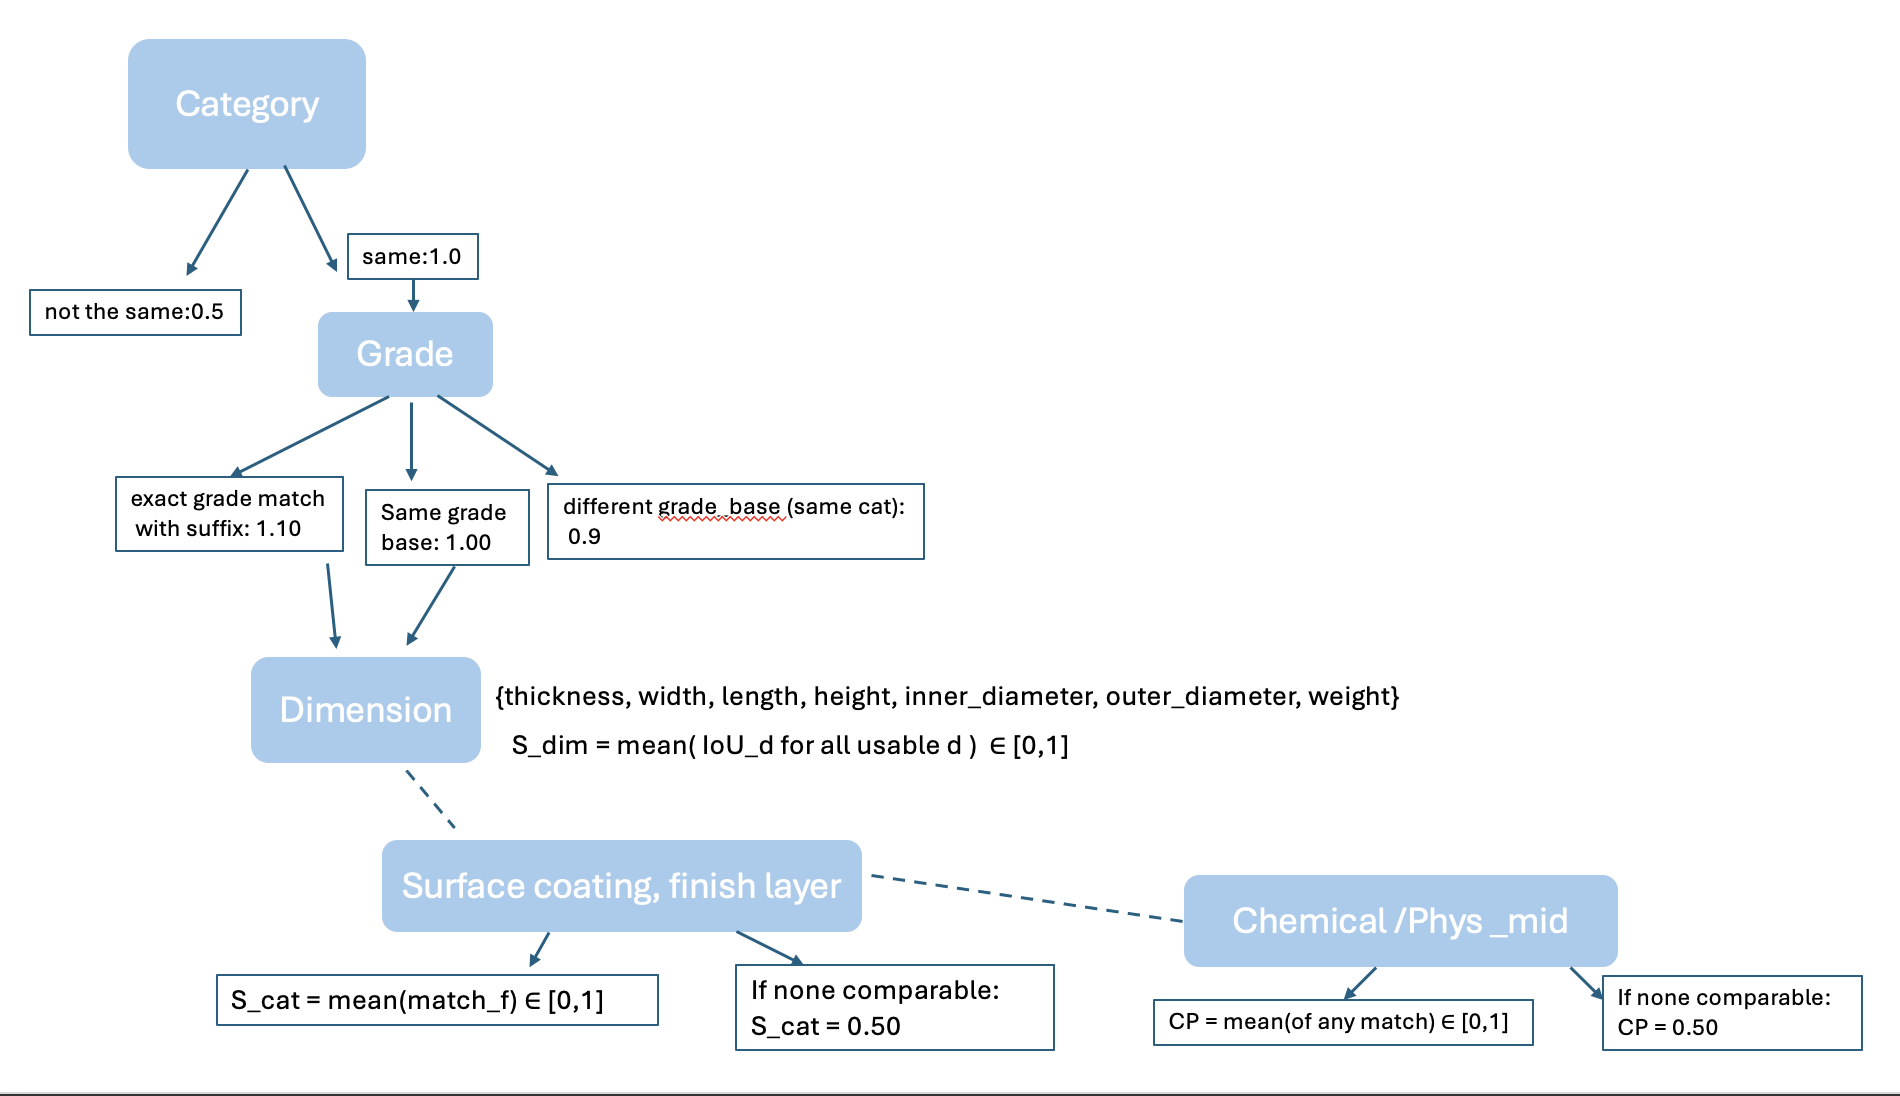

BranchMultiplier = CategoryMultiplier × GradeTierMultiplier
FinalScore = BranchMultiplier × ( 0.60 × S_dim  +  0.30 × S_cat + 0.10 CP)


#### Comparison algorithm

1.  Exclude self by id. We never compare an RFQ to itself.

2. Category gate → CategoryMultiplier.

    - If we’re in strict mode: only same-Category candidates are kept (CategoryMultiplier = 1.00). Others are dropped.

    - If we allow fallback: other Categories are kept but penalized (CategoryMultiplier = 0.50).

3. Grade tier → GradeTierMultiplier.

    - Exact grade+suffix : *1.00

    - Same grade_base: *0.95

    - Different grade_base: *0.85

4. Similarity inside the gate (continuous scores):

    - S_dim: mean IoU across all dimensions that both rows have (equal weight).

    - S_cat: binary matches (coating, finish, surface_type, surface_protection, form), averaged; ignore NaNs; if nothing to compare → 0.5.

    - CP: only Tensile strength (Rm)_mid:

        - within ±10% → 1

        - outside ±10% → 0

        - missing on either side → 0.30

5. Final score (always 0-1):

BranchMultiplier = CategoryMultiplier * GradeTierMultiplier

Final = BranchMultiplier * ( 0.60 * S_dim + 0.30* S_cat + 0.10*CP)

Because all the multiplier stay in [0,1], the final score is in that range as well.

6. Ranking & output.

- compute a Final score for every candidate that passed the (optional) Category gate—not just one “branch.”

- bucket the pool by grade_base (same vs different) for organization, but everyone still gets scored; the multiplier naturally favors same-base.

- sort by Final (desc), with simple tie order (Final → S_dim → S_cat → number of dims used), and report top-3.

In [34]:
# as I intend to run ablation analysis, I save the joined dataframe and reuse it in the another notebook - TaskB_ablation
joined_df.to_csv("joined_all.csv", index=False)

In [35]:
from utils.similarity_score import run_topk_with_config

In [ ]:
baseline_topk = run_topk_with_config(joined_df, cfg={}, name='baseline', top_k=3, allow_category_fallback=True)
keep = ["query_id", "candidate_id", "final_score"]
top3_out = baseline_topk.loc[:, keep].copy()
top3_out.rename(columns={"query_id": "rfq_id", "candidate_id": "match_id", "final_score": "similarity_score"}, inplace=True)
top3_out.to_csv("deliverables/top3.csv", index=False)